In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

mpl.style.use('seaborn')
plt.rcParams['figure.figsize'] = [20, 7]
import datetime
from dateutil.parser import parse as parse_date

# Check dx = p*(1-x)*x

In [2]:
N = 10**7
p = 0.1

In [3]:
dx = 1
x = 1/N
v = []
iter = 0
start = 0
stop = 0

In [4]:
while p/(2*N) <= dx:
    iter += 1
    v.append(x)
    dx = (1-x)*x*p
    x += dx

In [5]:
len(v)

330

In [6]:
v[::int(len(v)/10)]

[1e-07,
 2.3225107494282854e-06,
 5.393813971158549e-05,
 0.001251357813121039,
 0.028345386246962555,
 0.4151645235515964,
 0.9545024811013461,
 0.998521764552968,
 0.9999542450389027,
 0.9999985859577067]

In [7]:
df = pd.DataFrame(v)

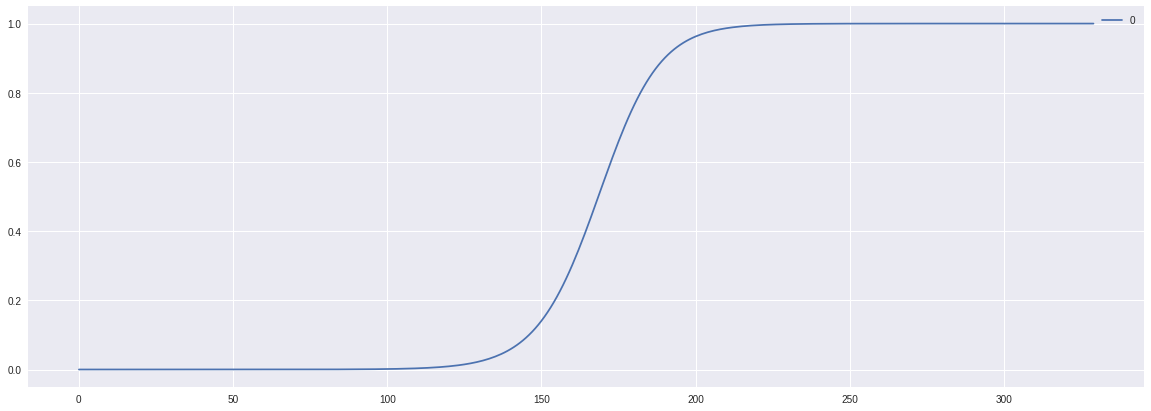

In [8]:
df.plot()

In [9]:
growth = ((df - df.shift(1))/df)

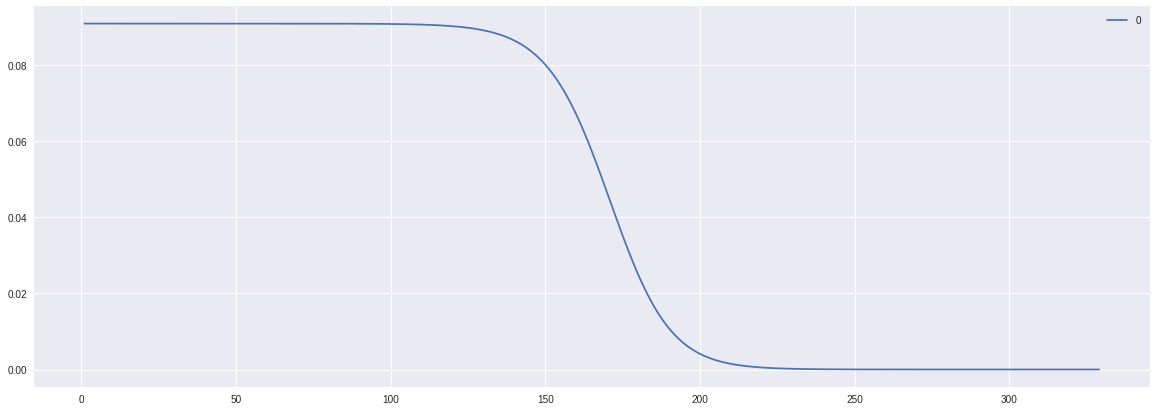

In [10]:
growth.plot()

In [11]:
scatter = pd.DataFrame({'total': df[0], 'growth': growth[0]})

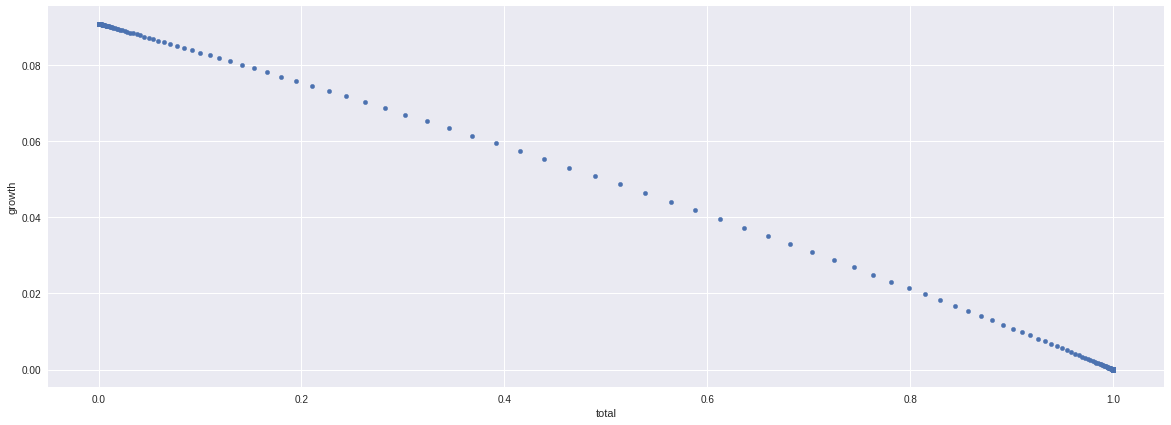

In [12]:
scatter.plot.scatter(x='total', y='growth')

# check dx= p * (1-x(n)) * (x(n) - x(n-L))

In [13]:
N = 100**7
p = 0.3
L = 10
F = 2*10

In [14]:
dx = 1
x = 1/N
v = [0]*L
iter = 0

In [15]:
while p/(2*N) <= dx:
    iter += 1
    v.append(x)
    dx = (1-x)*(x-v[-L])*p
    x += dx

In [16]:
v = v[2*(L+1):]

In [17]:
len(v)

242

In [18]:
v[::int(len(v)/10)]

[2.1777085122477333e-13,
 6.121150274780971e-11,
 1.6752111600699777e-08,
 4.5841934627724274e-06,
 0.0012530909197646075,
 0.26215267685440535,
 0.9253766148601518,
 0.9288460379519888,
 0.9288502245406787,
 0.9288502295717099,
 0.9288502295777556]

In [19]:
df = pd.DataFrame(v)

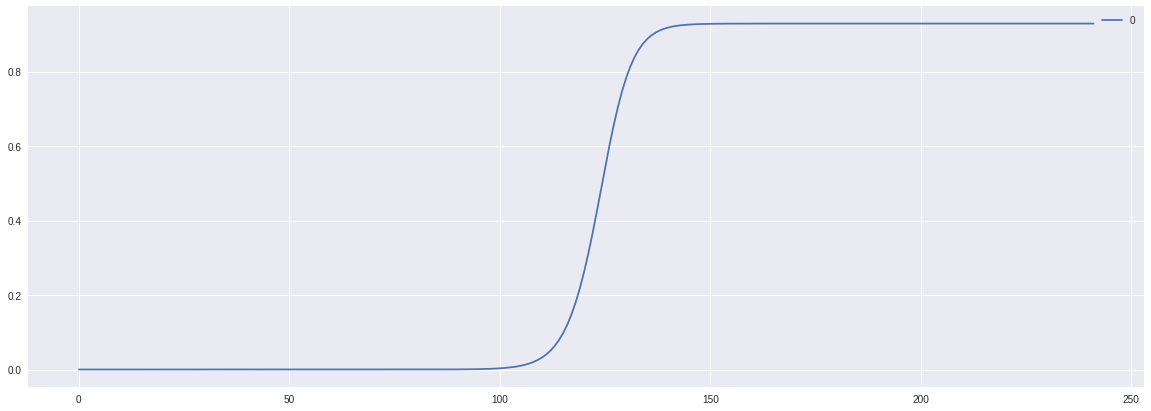

In [20]:
df.plot()

In [21]:
growth = ((df - df.shift(1))/df)

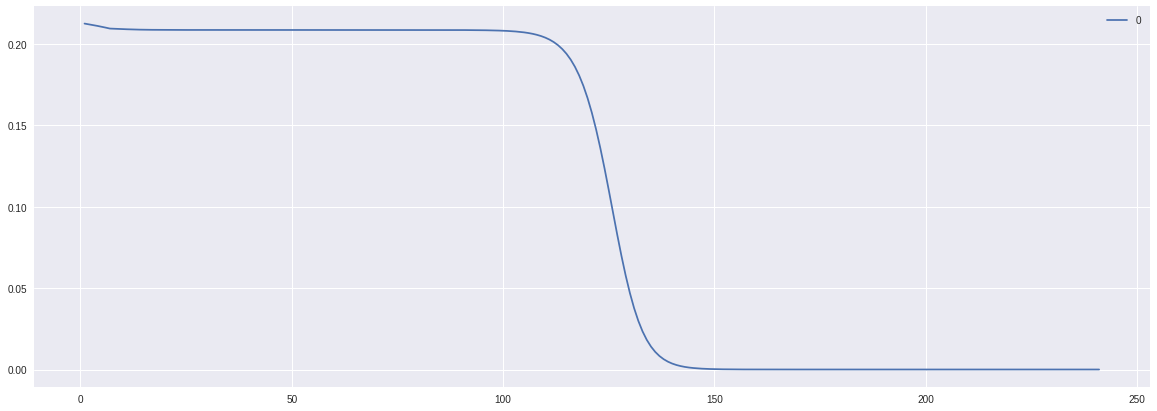

In [22]:
growth.plot()

In [23]:
scatter = pd.DataFrame({'total': df[0], 'growth': growth[0]})

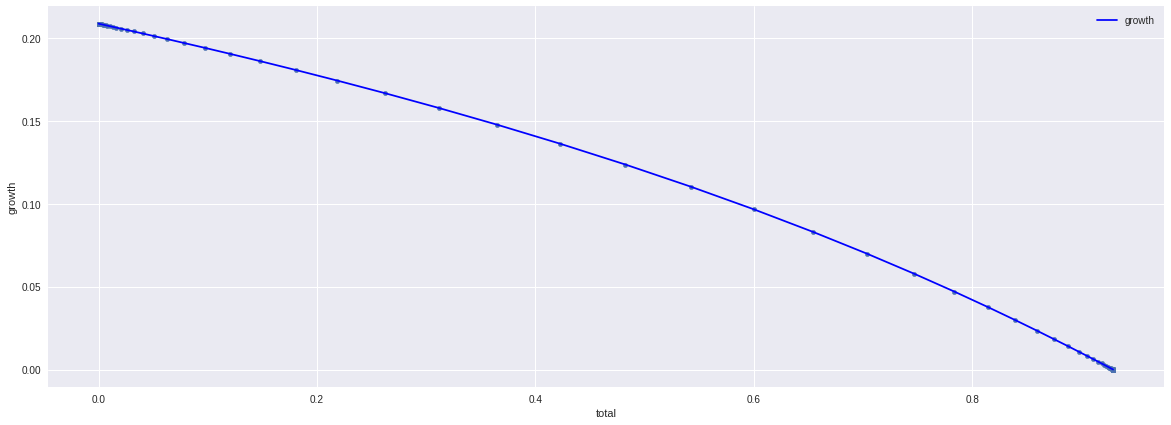

In [24]:
ax = scatter[F:].plot.scatter(x='total', y='growth')
scatter[F:].plot.line(x='total', y='growth', ax=ax, style='b')

# check with changing P dx= p * (1-x(n)) * (x(n) - x(n-L))

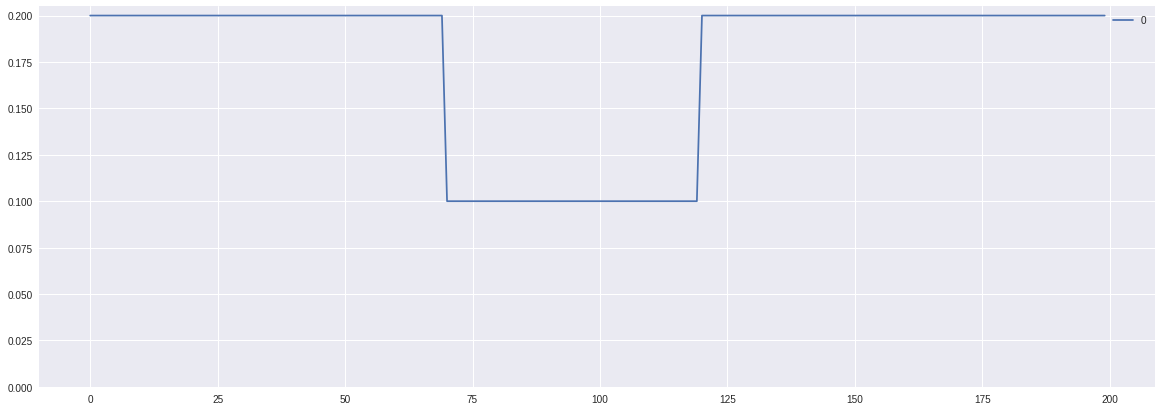

In [31]:
M = 100
# pv = [(x-M/2)**2/((M/2)**2)*0.35+0.05 for x in range(M)]
pv = [0.2]*70 + [0.1]*50 + [0.2]*80
ax = pd.DataFrame(pv).plot()
ax.set_ybound(lower=0)

In [32]:
N = 10**5
L = 10
F = 40

dx = 1
x = 1/N
v = [0]*L
iter = 0

while 1/(N*100) <= dx:
    iter += 1
    v.append(x)
    p = pv[min(len(pv)-1, iter)]
    dx = (1-x)*(x-v[-L])*p
    x += dx
        
v = v[2*(L+1):]
len(v)

353

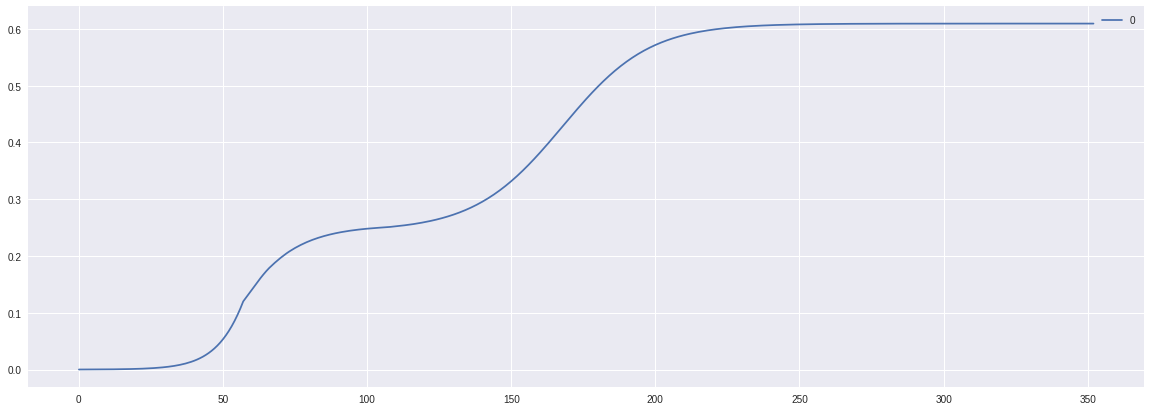

In [33]:
df = pd.DataFrame(v)
df.plot()

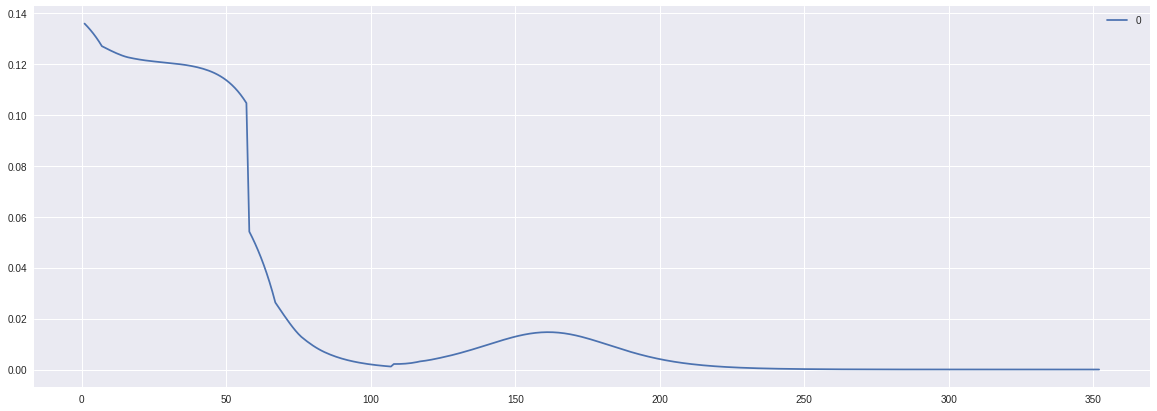

In [34]:
growth = ((df - df.shift(1))/df)
growth.plot()

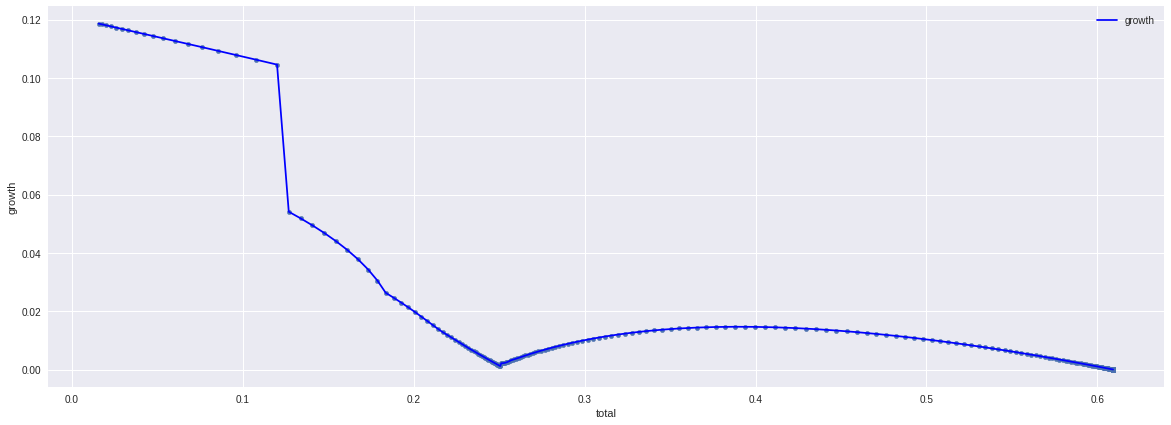

In [35]:
scatter = pd.DataFrame({'total': df[0], 'growth': growth[0]})

ax = scatter[F:].plot.scatter(x='total', y='growth')
scatter[F:].plot.line(x='total', y='growth', ax=ax, style='b')

# Check how a linear looks like

In [30]:
N = 10*4
v = [i/N for i in range(N)]

In [31]:
df = pd.DataFrame(v)

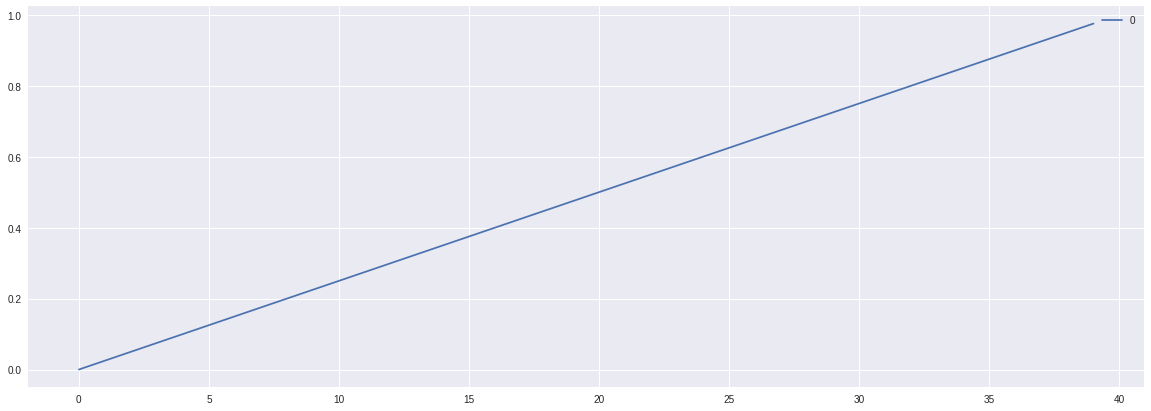

In [32]:
df.plot()

In [33]:
growth = ((df - df.shift(1))/df)

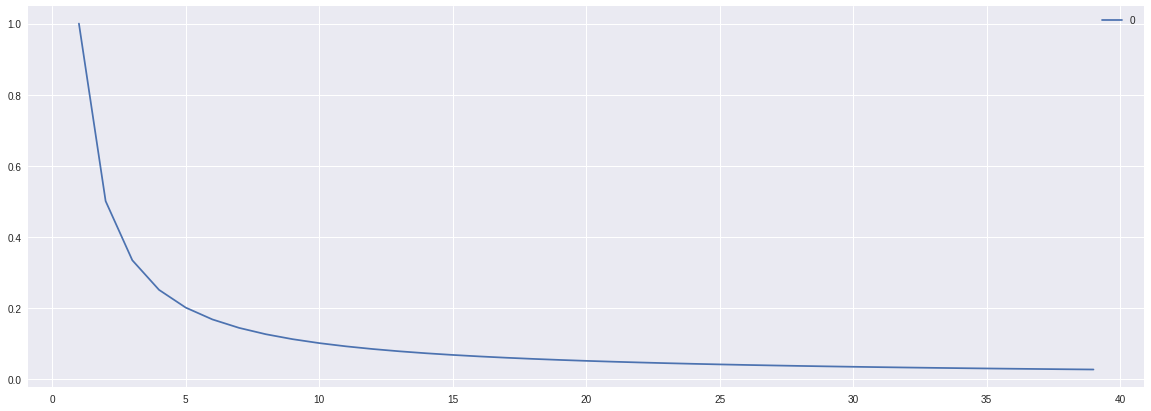

In [34]:
growth.plot()

In [35]:
scatter = pd.DataFrame({'total': df[0], 'growth': growth[0]})

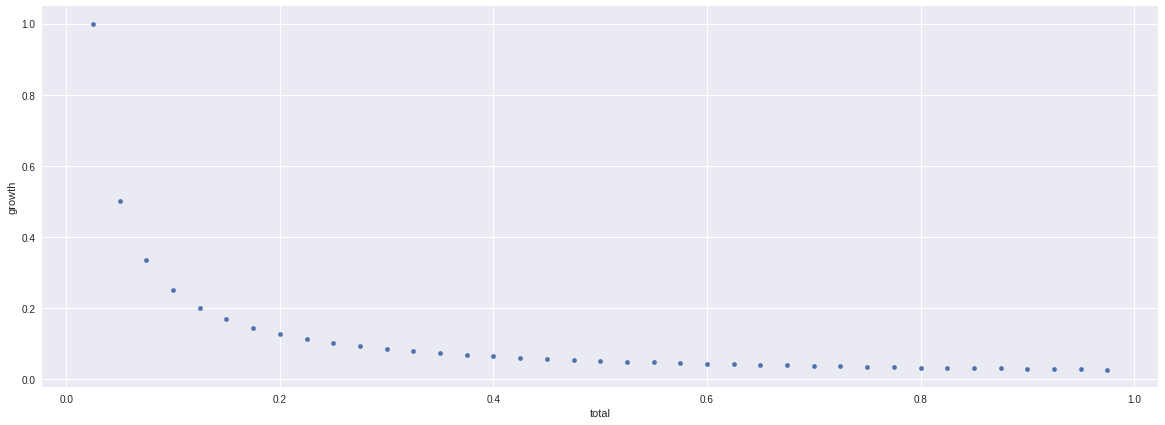

In [36]:
scatter.plot.scatter(x='total', y='growth')

# Check how exponential looks like

In [37]:
N = 30
v = [2**i for i in range(N)]

In [38]:
df = pd.DataFrame(v)

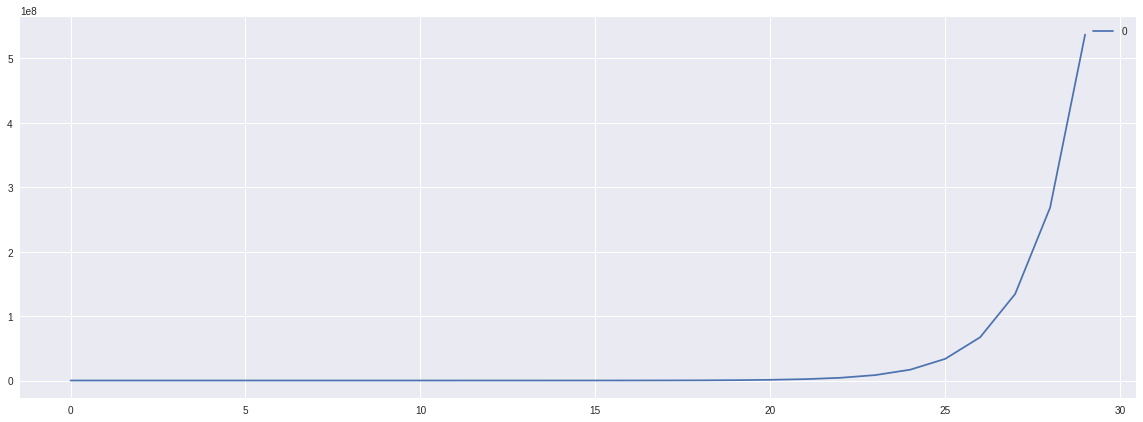

In [39]:
df.plot()

In [40]:
growth = ((df - df.shift(1))/df)

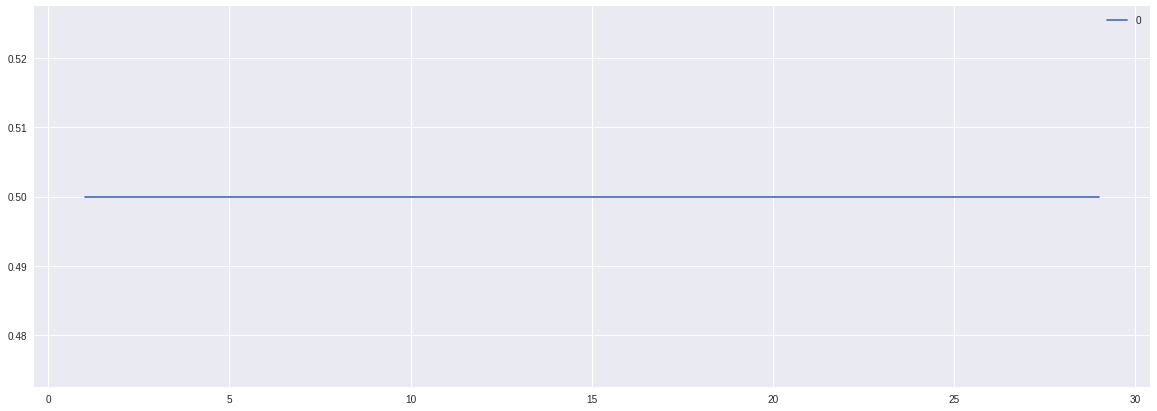

In [41]:
growth.plot()

In [42]:
scatter = pd.DataFrame({'total': df[0], 'growth': growth[0]})

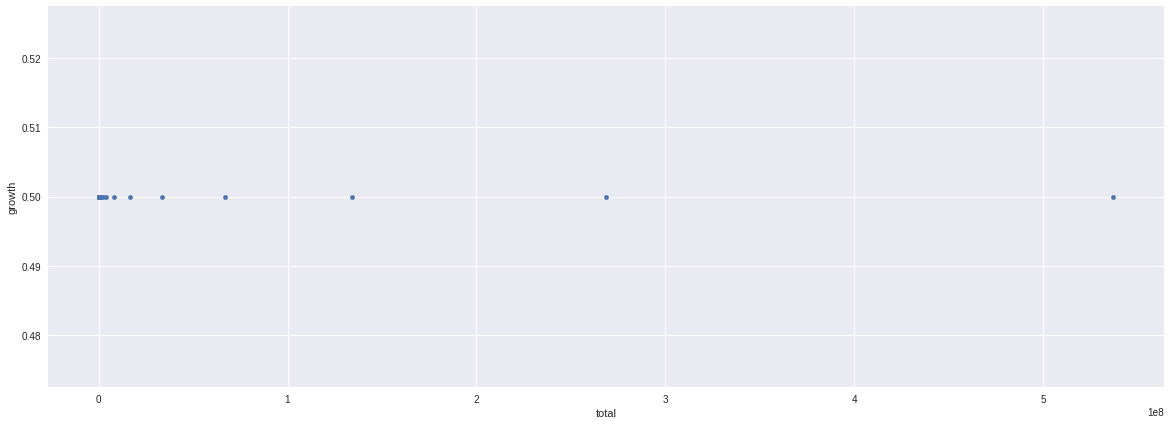

In [43]:
scatter.plot.scatter(x='total', y='growth')